# BikeEase Incremental Capstone Project - Part 2

# Libraries Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import clone

from IPython.display import Image
import matplotlib.image as mpimg

# Task 1: Feature Engineering

## Load FloridaBikeRentals.csv Dataset into a DataFrame using Pandas

In [ ]:
og = pd.read_csv('FloridaBikeRentals.csv')
df = og.copy()

## Data Analysis

In [ ]:
# view first few rows
df.head()

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0  01-12-2017                254     0            -5.2           37   
1  01-12-2017                204     1            -5.5           38   
2  01-12-2017                173     2            -6.0           39   
3  01-12-2017                107     3            -6.2           40   
4  01-12-2017                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# shape
df.shape

# 8760 rows
# 14 columns

(8760, 14)

In [ ]:
# initial statistics about DataFrame
df.describe()

Rented Bike Count         Hour  Temperature(C)  Humidity(%)  \
count        8760.000000  8760.000000     8760.000000  8760.000000   
mean          704.602055    11.500000       12.882922    58.226256   
std           644.997468     6.922582       11.944825    20.362413   
min             0.000000     0.000000      -17.800000     0.000000   
25%           191.000000     5.750000        3.500000    42.000000   
50%           504.500000    11.500000       13.700000    57.000000   
75%          1065.250000    17.250000       22.500000    74.000000   
max          3556.000000    23.000000       39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
count       8760.000000       8760.000000               8760.000000   
mean           1.724909       1436.825799                  4.073813   
std            1.036300        608.298712                 13.060369   
min            0.000000         27.000000                -30.600000   
25%            0.900000        940.000000                 -4.700000   
50%            1.500000       1698.000000                  5.100000   
75%            2.300000       2000.000000                 14.800000   
max            7.400000       2000.000000                 27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [ ]:
#view column names, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [ ]:
# identify missing values
df.isnull().sum()

# there are no missing values

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [ ]:
# check for duplicate records
df.duplicated().sum()

# there are no duplicate records

np.int64(0)

### Correlation Matrix
Computed a Correlation Matrix on numerical features to get an understanding of how strongly features are related to each other.

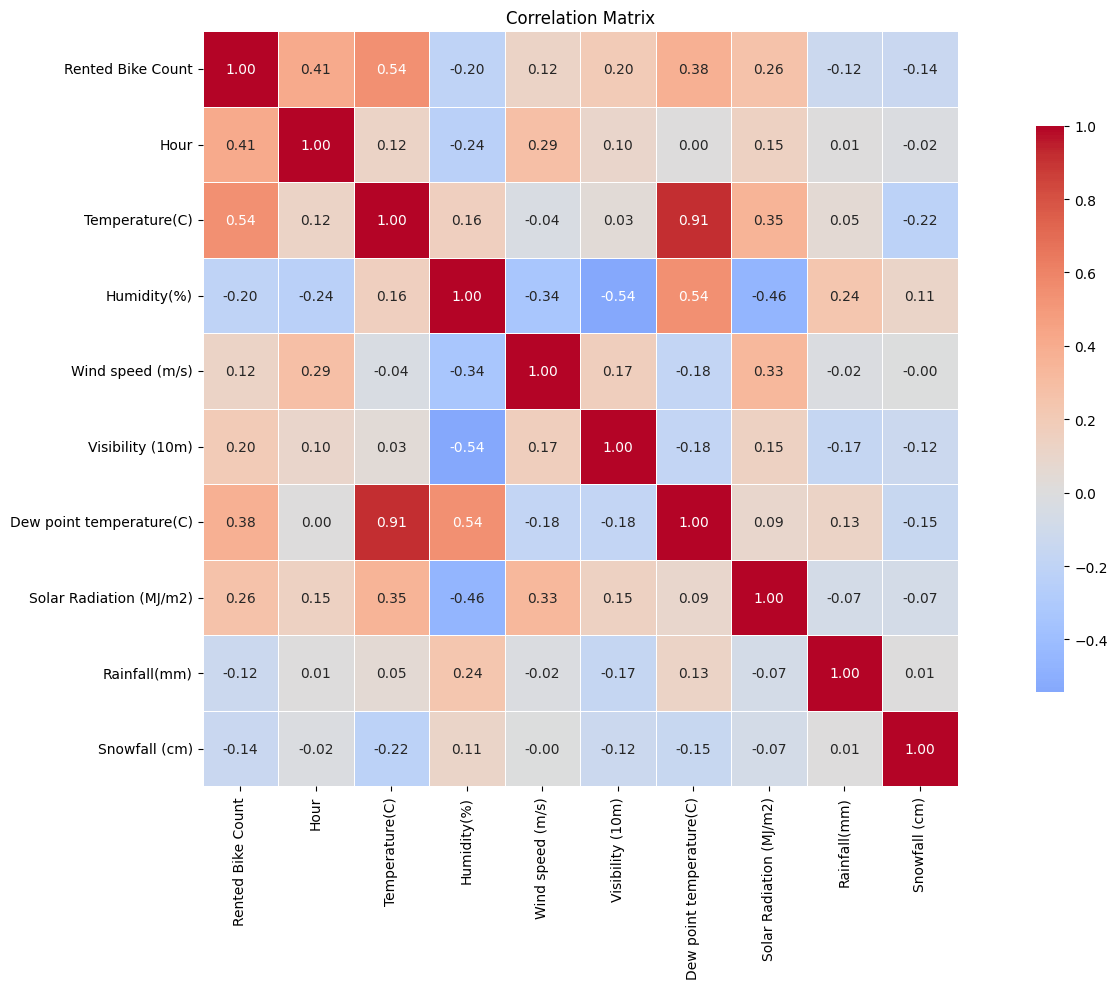

In [ ]:
# select only numerical columns
numerical_df = df.select_dtypes(include='number')

# compute Correlation Matrix
corr_matrix = numerical_df.corr()

# graph on heatmap
plt.figure(figsize=(16, 10))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.75}
)

# add title
plt.title('Correlation Matrix')

plt.savefig('correlation_matrix.png')

plt.tight_layout()
plt.show()

### Selecting Relevant Features

*   `Hour` - Strongly tied to rental patterns (e.g., day vs. night)
*   `Temperature(°C)` - The strongest predictor; affects people's comfort and outdoor activity levels
*   `Rainfall(mm)` - Negatively impacts rental patterns; typically discourages biking
*   `Snowfall (cm)` - Also negatively impacts rentals. Though rare in Florida, snowfall would significantly reduce bike usage
*   `Seasons` - Captures seasonal trends in rental
*   `Holiday` - Useful for detecting changes in demand on public holidays

In [ ]:
# select chosen features and target
features = ['Hour', 'Temperature(C)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday' ]
target = 'Rented Bike Count'

df = df[features + [target]]

df.head()

Hour  Temperature(C)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0     0            -5.2           0.0            0.0  Winter  No Holiday   
1     1            -5.5           0.0            0.0  Winter  No Holiday   
2     2            -6.0           0.0            0.0  Winter  No Holiday   
3     3            -6.2           0.0            0.0  Winter  No Holiday   
4     4            -6.0           0.0            0.0  Winter  No Holiday   

   Rented Bike Count  
0                254  
1                204  
2                173  
3                107  
4                 78

## Feature Creation

Has Precipitation: Combines Rainfall(mm) and Snowfall (cm) to indicate if any precipitation occured.

In [ ]:
df['Has_Precipitation'] = ((df['Rainfall(mm)'] > 0) | (df['Snowfall (cm)'] > 0)).astype(bool)

df

Temperature(C)  Rainfall(mm)  Snowfall (cm)  Holiday  Rented Bike Count  \
0          -1.513957       -0.1318      -0.171891    False                254   
1          -1.539074       -0.1318      -0.171891    False                204   
2          -1.580936       -0.1318      -0.171891    False                173   
3          -1.597680       -0.1318      -0.171891    False                107   
4          -1.580936       -0.1318      -0.171891    False                 78   
...              ...           ...            ...      ...                ...   
8755       -0.726961       -0.1318      -0.171891    False               1003   
8756       -0.793939       -0.1318      -0.171891    False                764   
8757       -0.860918       -0.1318      -0.171891    False                694   
8758       -0.902779       -0.1318      -0.171891    False                712   
8759       -0.919524       -0.1318      -0.171891    False                584   

      Has_Precipitation  Is_Hot_Holiday  Seasons_Autumn  Seasons_Spring  \
0                 False           False           False           False   
1                 False           False           False           False   
2                 False           False           False           False   
3                 False           False           False           False   
4                 False           False           False           False   
...                 ...             ...             ...             ...   
8755              False           False            True           False   
8756              False           False            True           False   
8757              False           False            True           False   
8758              False           False            True           False   
8759              False           False            True           False   

      Seasons_Summer  Seasons_Winter      Hour_sin  Hour_cos  
0              False            True  2.638329e-17  1.414214  
1              False            True  3.660254e-01  1.366025  
2              False            True  7.071068e-01  1.224745  
3              False            True  1.000000e+00  1.000000  
4              False            True  1.224745e+00  0.707107  
...              ...             ...           ...       ...  
8755           False           False -1.366025e+00  0.366025  
8756           False           False -1.224745e+00  0.707107  
8757           False           False -1.000000e+00  1.000000  
8758           False           False -7.071068e-01  1.224745  
8759           False           False -3.660254e-01  1.366025  

[8760 rows x 13 columns]

Temperature and Holiday: Flag for high temperature holidays.

In [ ]:
df['Is_Hot_Holiday'] = ((df['Temperature(C)'] > 28) & (df['Holiday'] == 'Holiday')).astype(bool)

df

Hour  Temperature(C)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0        0            -5.2           0.0            0.0  Winter  No Holiday   
1        1            -5.5           0.0            0.0  Winter  No Holiday   
2        2            -6.0           0.0            0.0  Winter  No Holiday   
3        3            -6.2           0.0            0.0  Winter  No Holiday   
4        4            -6.0           0.0            0.0  Winter  No Holiday   
...    ...             ...           ...            ...     ...         ...   
8755    19             4.2           0.0            0.0  Autumn  No Holiday   
8756    20             3.4           0.0            0.0  Autumn  No Holiday   
8757    21             2.6           0.0            0.0  Autumn  No Holiday   
8758    22             2.1           0.0            0.0  Autumn  No Holiday   
8759    23             1.9           0.0            0.0  Autumn  No Holiday   

      Rented Bike Count  Has_Precipitation  Is_Hot_Holiday  
0                   254              False           False  
1                   204              False           False  
2                   173              False           False  
3                   107              False           False  
4                    78              False           False  
...                 ...                ...             ...  
8755               1003              False           False  
8756                764              False           False  
8757                694              False           False  
8758                712              False           False  
8759                584              False           False  

[8760 rows x 9 columns]

## Categorical Features Encoding

In [ ]:
# using one-hot encoding for Seasons
df = pd.get_dummies(df, columns=['Seasons'])

df.head()

Hour  Temperature(C)  Rainfall(mm)  Snowfall (cm)     Holiday  \
0     0            -5.2           0.0            0.0  No Holiday   
1     1            -5.5           0.0            0.0  No Holiday   
2     2            -6.0           0.0            0.0  No Holiday   
3     3            -6.2           0.0            0.0  No Holiday   
4     4            -6.0           0.0            0.0  No Holiday   

   Rented Bike Count  Has_Precipitation  Is_Hot_Holiday  Seasons_Autumn  \
0                254              False           False           False   
1                204              False           False           False   
2                173              False           False           False   
3                107              False           False           False   
4                 78              False           False           False   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  
0           False           False            True  
1           False           False            True  
2           False           False            True  
3           False           False            True  
4           False           False            True

In [ ]:
# using cyclical encoding for Hour to preserve hour-to-hour proximity
# both sine and cosine are needed to represent a 24 hour clock so that each hour is a unique point on a circle
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

# drop original Hour feature
df.drop(columns=['Hour'], inplace=True)

df

Temperature(C)  Rainfall(mm)  Snowfall (cm)     Holiday  \
0               -5.2           0.0            0.0  No Holiday   
1               -5.5           0.0            0.0  No Holiday   
2               -6.0           0.0            0.0  No Holiday   
3               -6.2           0.0            0.0  No Holiday   
4               -6.0           0.0            0.0  No Holiday   
...              ...           ...            ...         ...   
8755             4.2           0.0            0.0  No Holiday   
8756             3.4           0.0            0.0  No Holiday   
8757             2.6           0.0            0.0  No Holiday   
8758             2.1           0.0            0.0  No Holiday   
8759             1.9           0.0            0.0  No Holiday   

      Rented Bike Count  Has_Precipitation  Is_Hot_Holiday  Seasons_Autumn  \
0                   254              False           False           False   
1                   204              False           False           False   
2                   173              False           False           False   
3                   107              False           False           False   
4                    78              False           False           False   
...                 ...                ...             ...             ...   
8755               1003              False           False            True   
8756                764              False           False            True   
8757                694              False           False            True   
8758                712              False           False            True   
8759                584              False           False            True   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  Hour_sin  Hour_cos  
0              False           False            True  0.000000  1.000000  
1              False           False            True  0.258819  0.965926  
2              False           False            True  0.500000  0.866025  
3              False           False            True  0.707107  0.707107  
4              False           False            True  0.866025  0.500000  
...              ...             ...             ...       ...       ...  
8755           False           False           False -0.965926  0.258819  
8756           False           False           False -0.866025  0.500000  
8757           False           False           False -0.707107  0.707107  
8758           False           False           False -0.500000  0.866025  
8759           False           False           False -0.258819  0.965926  

[8760 rows x 13 columns]

## Distribution of Rentals

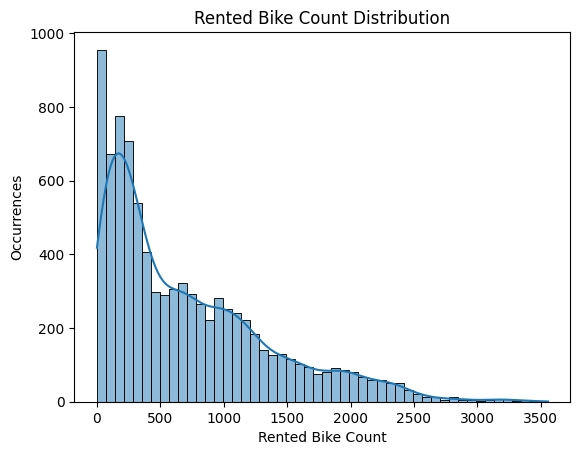

In [ ]:
# create a hist plot of Rented Bike Count, with 30 bins and set kde to true
sns.histplot(df['Rented Bike Count'], bins=50, kde=True)
plt.title('Rented Bike Count Distribution')
plt.ylabel('Occurrences')

plt.savefig('rentals_distribution.png')

plt.show()

The histogram is heavily skewed to the right, indicating the presence of outliers and occasional spikes in rental activity. Most hourly Rented Bike Count are concentrated at lower values, primarily between 0 and 500, with the most common range being 100 to 300 rentals.

## Scaling Numerical Features

In [ ]:
numerical_features = ['Hour_sin', 'Hour_cos','Temperature(C)','Rainfall(mm)','Snowfall (cm)']

# import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# initalize the StandardScaler object
scaler = StandardScaler()

# fit and transform the numerical features
scaled_array = scaler.fit_transform(df[numerical_features])

# create a DataFrame from the scaled array with the same column names
scaled_df = pd.DataFrame(scaled_array, columns=numerical_features)

# replace the original numerical columns with the scaled ones
df[numerical_features] = scaled_df

df

Temperature(C)  Rainfall(mm)  Snowfall (cm)     Holiday  \
0          -1.513957       -0.1318      -0.171891  No Holiday   
1          -1.539074       -0.1318      -0.171891  No Holiday   
2          -1.580936       -0.1318      -0.171891  No Holiday   
3          -1.597680       -0.1318      -0.171891  No Holiday   
4          -1.580936       -0.1318      -0.171891  No Holiday   
...              ...           ...            ...         ...   
8755       -0.726961       -0.1318      -0.171891  No Holiday   
8756       -0.793939       -0.1318      -0.171891  No Holiday   
8757       -0.860918       -0.1318      -0.171891  No Holiday   
8758       -0.902779       -0.1318      -0.171891  No Holiday   
8759       -0.919524       -0.1318      -0.171891  No Holiday   

      Rented Bike Count  Has_Precipitation  Is_Hot_Holiday  Seasons_Autumn  \
0                   254              False           False           False   
1                   204              False           False           False   
2                   173              False           False           False   
3                   107              False           False           False   
4                    78              False           False           False   
...                 ...                ...             ...             ...   
8755               1003              False           False            True   
8756                764              False           False            True   
8757                694              False           False            True   
8758                712              False           False            True   
8759                584              False           False            True   

      Seasons_Spring  Seasons_Summer  Seasons_Winter      Hour_sin  Hour_cos  
0              False           False            True  2.638329e-17  1.414214  
1              False           False            True  3.660254e-01  1.366025  
2              False           False            True  7.071068e-01  1.224745  
3              False           False            True  1.000000e+00  1.000000  
4              False           False            True  1.224745e+00  0.707107  
...              ...             ...             ...           ...       ...  
8755           False           False           False -1.366025e+00  0.366025  
8756           False           False           False -1.224745e+00  0.707107  
8757           False           False           False -1.000000e+00  1.000000  
8758           False           False           False -7.071068e-01  1.224745  
8759           False           False           False -3.660254e-01  1.366025  

[8760 rows x 13 columns]

## Data Types Optimizations

In [ ]:
# Rented Bike Count saved as Int16 since number range is not large
df['Rented Bike Count'] = df['Rented Bike Count'].astype('Int16')

# Holiday saved as bool
df['Holiday'] = df['Holiday'].map({'Holiday': True, 'No Holiday': False})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature(C)     8760 non-null   float64
 1   Rainfall(mm)       8760 non-null   float64
 2   Snowfall (cm)      8760 non-null   float64
 3   Holiday            8760 non-null   bool   
 4   Rented Bike Count  8760 non-null   Int16  
 5   Has_Precipitation  8760 non-null   bool   
 6   Is_Hot_Holiday     8760 non-null   bool   
 7   Seasons_Autumn     8760 non-null   bool   
 8   Seasons_Spring     8760 non-null   bool   
 9   Seasons_Summer     8760 non-null   bool   
 10  Seasons_Winter     8760 non-null   bool   
 11  Hour_sin           8760 non-null   float64
 12  Hour_cos           8760 non-null   float64
dtypes: Int16(1), bool(7), float64(5)
memory usage: 427.9 KB


In [ ]:
df.head()

Temperature(C)  Rainfall(mm)  Snowfall (cm)  Holiday  Rented Bike Count  \
0       -1.513957       -0.1318      -0.171891    False                254   
1       -1.539074       -0.1318      -0.171891    False                204   
2       -1.580936       -0.1318      -0.171891    False                173   
3       -1.597680       -0.1318      -0.171891    False                107   
4       -1.580936       -0.1318      -0.171891    False                 78   

   Has_Precipitation  Is_Hot_Holiday  Seasons_Autumn  Seasons_Spring  \
0              False           False           False           False   
1              False           False           False           False   
2              False           False           False           False   
3              False           False           False           False   
4              False           False           False           False   

   Seasons_Summer  Seasons_Winter      Hour_sin  Hour_cos  
0           False            True  2.638329e-17  1.414214  
1           False            True  3.660254e-01  1.366025  
2           False            True  7.071068e-01  1.224745  
3           False            True  1.000000e+00  1.000000  
4           False            True  1.224745e+00  0.707107

## Save the processed dataset as 'bike_rental_features.csv'

In [ ]:
df.to_csv('bike_rental_features.csv', index=False)

# Task 2: Model Building

## Features and Target Selection

In [ ]:
# select features and target
X = df.drop('Rented Bike Count', axis=1)
y = df[['Rented Bike Count']]

## Training and Test sets Splitting

In [ ]:
# split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Multiple Linear Regression


Train RMAE: 19.92, Train RMSE: 539.72, R²: 0.30
Test RMAE: 19.91, Test RMSE: 538.21, R²: 0.30

Actual vs predicted Rented Bike Count (test set):
          Hour_sin      Hour_cos  Temperature(C)  actual_rented_bike_count  \
6056  1.224745e+00 -7.071068e-01        1.198669                      1728   
5556  1.995745e-16 -1.414214e+00        1.650774                       822   
5990 -7.071068e-01 -1.224745e+00        1.767986                       658   
7674 -1.414214e+00 -1.813539e-16        0.336322                      2716   
3319  1.366025e+00 -3.660254e-01       -0.542770                      1083   

      predicted_rented_bike_count  
6056                  1052.448708  
5556                  1222.974385  
5990                  1267.184745  
7674                   912.501133  
3319                   513.174855  


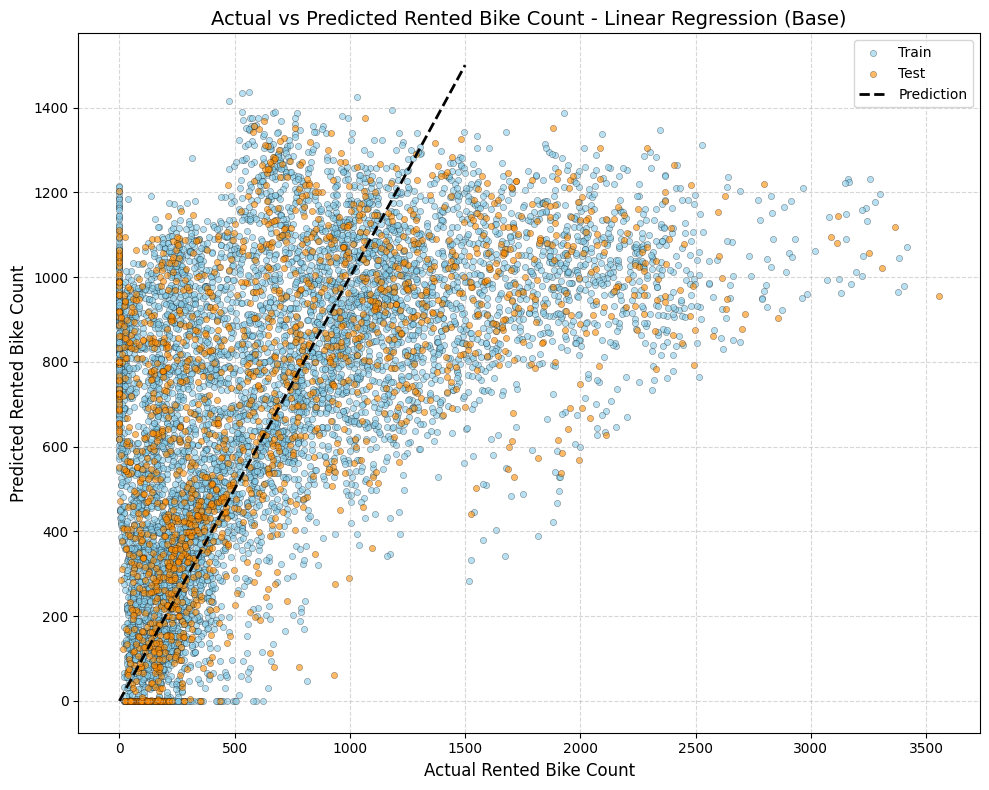

In [ ]:
# create the model object
lr_model = LinearRegression(positive=True)

# fit the model on training data
lr_model.fit(X_train, y_train)

# predict on train and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# clip so there are no negative values
y_train_pred = y_train_pred.clip(min=0)
y_test_pred = y_test_pred.clip(min=0)

# calculate RMAE, RMSE and R² for training and test set
train_rmae = np.sqrt(mean_absolute_error(y_train, y_train_pred))
test_rmae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train RMAE: {train_rmae:.2f}, Train RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}')
print(f'Test RMAE: {test_rmae:.2f}, Test RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}')

# show comparison table for the test set
results_df = X_test.copy()
results_df['actual_rented_bike_count'] = y_test
results_df['predicted_rented_bike_count'] = y_test_pred
print('\nActual vs predicted Rented Bike Count (test set):')
print(results_df[['Hour_sin', 'Hour_cos', 'Temperature(C)', 'actual_rented_bike_count', 'predicted_rented_bike_count']].head())

# plot actual vs predicted rentals for both sets
plt.figure(figsize=(10, 8))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.6, s=20, color='skyblue', edgecolor='k', linewidth=0.3)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.6, s=20, color='darkorange', edgecolor='k', linewidth=0.3)

plt.plot([0, 1500], [0, 1500], '--', color='black', linewidth=2, label='Prediction')

# add title and labels
plt.xlabel('Actual Rented Bike Count', fontsize=12)
plt.ylabel('Predicted Rented Bike Count', fontsize=12)
plt.title('Actual vs Predicted Rented Bike Count - Linear Regression (Base)', fontsize=14)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('linear_regression_base.png', dpi=300)

plt.tight_layout()
plt.show()

Model Summary:

*   model had negative predicted bike counts which did not make sense and was clipped
*   on average, predictions deviate from actual values by ~20 units
*   captures 30% of the variance in the bike rental data
*   model is off by about 539.72 rentals per hour on average



## Ridge Regression (L2 Regularization)

Train RMAE: 18.14, Train RMSE: 457.33, R²: 0.50
Test RMAE: 18.33, Test RMSE: 469.43, R²: 0.47

Actual vs predicted Rented Bike Count (test set):
          Hour_sin      Hour_cos  Temperature(C)  actual_rented_bike_count  \
6056  1.224745e+00 -7.071068e-01        1.198669                      1728   
5556  1.995745e-16 -1.414214e+00        1.650774                       822   
5990 -7.071068e-01 -1.224745e+00        1.767986                       658   
7674 -1.414214e+00 -1.813539e-16        0.336322                      2716   
3319  1.366025e+00 -3.660254e-01       -0.542770                      1083   

      predicted_rented_bike_count  
6056                   814.050700  
5556                  1227.728907  
5990                  1417.922607  
7674                  1246.198359  
3319                   346.152319  


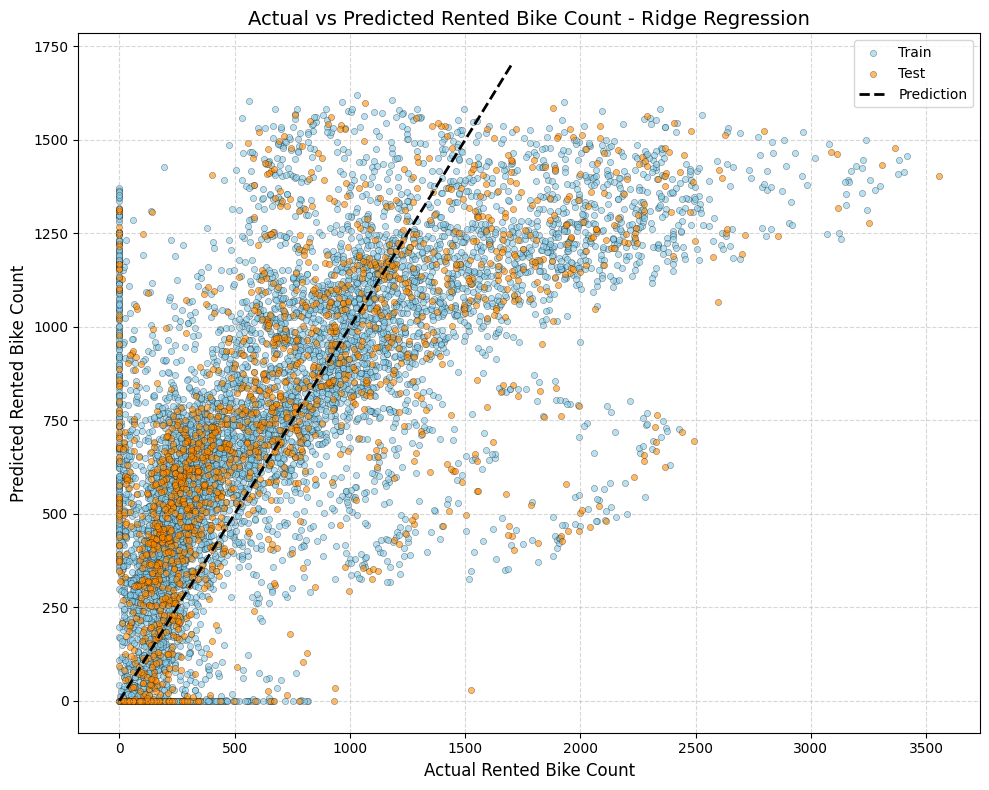

In [ ]:
# create the model object
ridge_model = Ridge(alpha=1.0)

# fit the model on training data
ridge_model.fit(X_train, y_train)

# predict on train and test sets
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# clip so there are no negative values
y_train_pred = y_train_pred.clip(min=0)
y_test_pred = y_test_pred.clip(min=0)

# calculate RMAE, RMSE and R² for training and test set
train_rmae = np.sqrt(mean_absolute_error(y_train, y_train_pred))
test_rmae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train RMAE: {train_rmae:.2f}, Train RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}')
print(f'Test RMAE: {test_rmae:.2f}, Test RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}')

# show comparison table for the test set
results_df = X_test.copy()
results_df['actual_rented_bike_count'] = y_test
results_df['predicted_rented_bike_count'] = y_test_pred
print('\nActual vs predicted Rented Bike Count (test set):')
print(results_df[['Hour_sin', 'Hour_cos', 'Temperature(C)', 'actual_rented_bike_count', 'predicted_rented_bike_count']].head())

# plot actual vs predicted rentals for both sets
plt.figure(figsize=(10, 8))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.6, s=20, color='skyblue', edgecolor='k', linewidth=0.3)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.6, s=20, color='darkorange', edgecolor='k', linewidth=0.3)

plt.plot([0, 1700], [0, 1700], '--', color='black', linewidth=2, label='Prediction')

# add title and labels
plt.xlabel('Actual Rented Bike Count', fontsize=12)
plt.ylabel('Predicted Rented Bike Count', fontsize=12)
plt.title('Actual vs Predicted Rented Bike Count - Ridge Regression', fontsize=14)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('ridge_regression_base.png', dpi=300)

plt.tight_layout()
plt.show()

Model Summary:

*   model had negative predicted bike counts which did not make sense and was clipped
*   on average, predictions deviate from actual values by ~18 units
*   captures 50% of the variance in the bike rental data
*   model is off by about 457 rentals per hour on average
*   overall improvement from Linear Regression model

## Lasso Regression (L1 Regularization)

Train RMAE: 18.15, Train RMSE: 457.94, R²: 0.50
Test RMAE: 18.33, Test RMSE: 469.99, R²: 0.47

Actual vs predicted Rented Bike Count (test set):
          Hour_sin      Hour_cos  Temperature(C)  actual_rented_bike_count  \
6056  1.224745e+00 -7.071068e-01        1.198669                      1728   
5556  1.995745e-16 -1.414214e+00        1.650774                       822   
5990 -7.071068e-01 -1.224745e+00        1.767986                       658   
7674 -1.414214e+00 -1.813539e-16        0.336322                      2716   
3319  1.366025e+00 -3.660254e-01       -0.542770                      1083   

      predicted_rented_bike_count  
6056                   807.717423  
5556                  1221.019008  
5990                  1410.955941  
7674                  1240.333223  
3319                   346.655524  


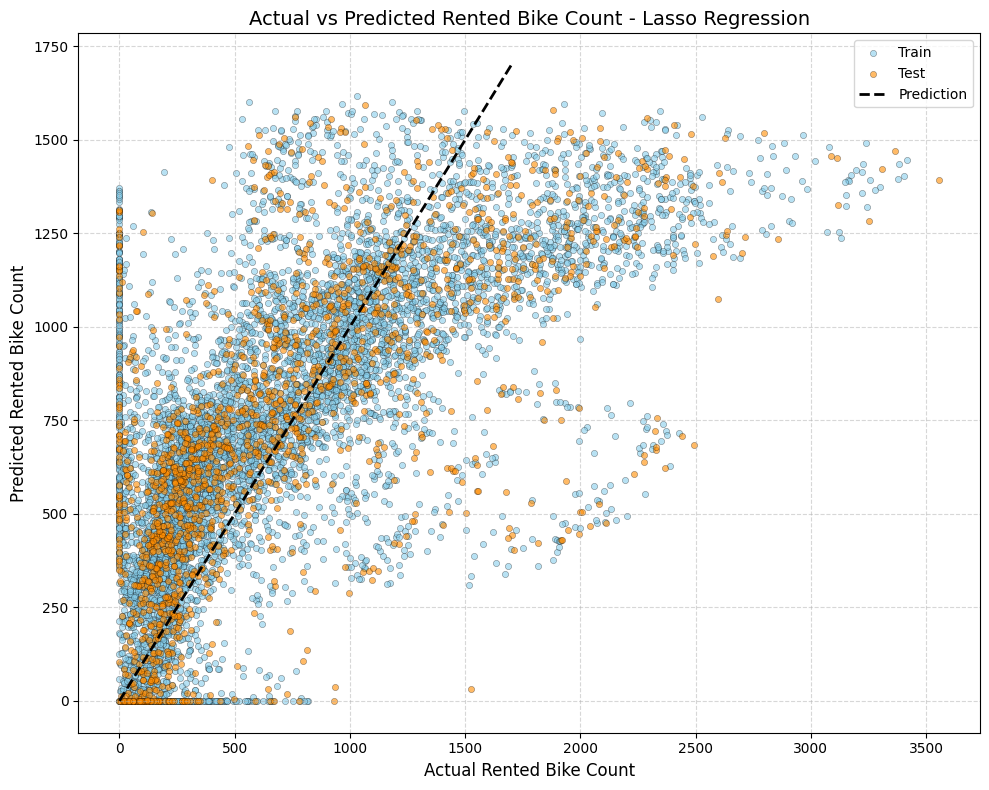

In [ ]:
# create the model object
lasso_model = Lasso(alpha=1.0, max_iter=10000)

# fit the model on training data
lasso_model.fit(X_train, y_train)

# predict on train and test sets
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# clip so there are no negative values
y_train_pred = y_train_pred.clip(min=0)
y_test_pred = y_test_pred.clip(min=0)

# calculate RMAE, RMSE and R² for training and test set
train_rmae = np.sqrt(mean_absolute_error(y_train, y_train_pred))
test_rmae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train RMAE: {train_rmae:.2f}, Train RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}')
print(f'Test RMAE: {test_rmae:.2f}, Test RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}')

# show comparison table for the test set
results_df = X_test.copy()
results_df['actual_rented_bike_count'] = y_test
results_df['predicted_rented_bike_count'] = y_test_pred
print('\nActual vs predicted Rented Bike Count (test set):')
print(results_df[['Hour_sin', 'Hour_cos', 'Temperature(C)', 'actual_rented_bike_count', 'predicted_rented_bike_count']].head())

# plot actual vs predicted rentals for both sets
plt.figure(figsize=(10, 8))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.6, s=20, color='skyblue', edgecolor='k', linewidth=0.3)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.6, s=20, color='darkorange', edgecolor='k', linewidth=0.3)

plt.plot([0, 1700], [0, 1700], '--', color='black', linewidth=2, label='Prediction')

# add title and labels
plt.xlabel('Actual Rented Bike Count', fontsize=12)
plt.ylabel('Predicted Rented Bike Count', fontsize=12)
plt.title('Actual vs Predicted Rented Bike Count - Lasso Regression', fontsize=14)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('lasso_regression_base.png', dpi=300)

plt.tight_layout()
plt.show()

Model Summary:

*   model had negative predicted bike counts which did not make sense and was clipped
*   on average, predictions deviate from actual values by ~18 units
*   captures 50% of the variance in the bike rental data
*   model is off by about 457 rentals per hour on average
*   Lasso Regression resulted almost identical metrics to Ridge Regression, still an overall improvement from Linear Regression model

## Elastic Net Regression

Train RMAE: 18.63, Train RMSE: 477.88, R²: 0.45
Test RMAE: 18.76, Test RMSE: 487.18, R²: 0.43

Actual vs predicted Rented Bike Count (test set):
          Hour_sin      Hour_cos  Temperature(C)  actual_rented_bike_count  \
6056  1.224745e+00 -7.071068e-01        1.198669                      1728   
5556  1.995745e-16 -1.414214e+00        1.650774                       822   
5990 -7.071068e-01 -1.224745e+00        1.767986                       658   
7674 -1.414214e+00 -1.813539e-16        0.336322                      2716   
3319  1.366025e+00 -3.660254e-01       -0.542770                      1083   

      predicted_rented_bike_count  
6056                   796.720290  
5556                  1154.629704  
5990                  1313.632342  
7674                  1119.688115  
3319                   359.502633  


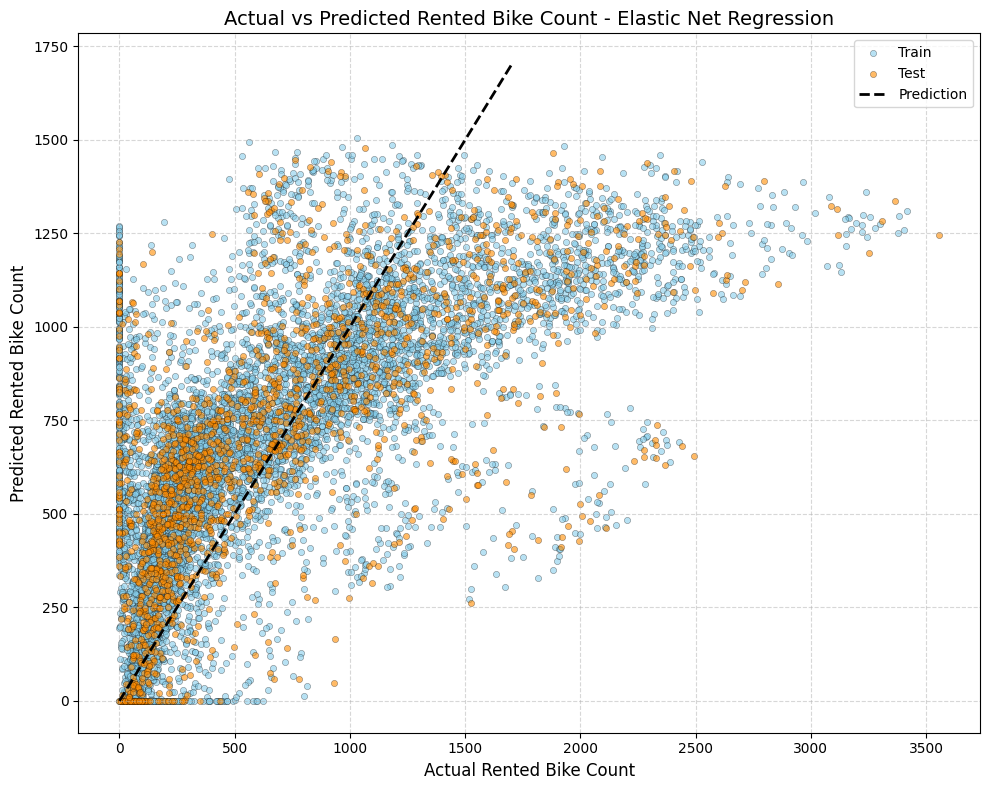

In [ ]:
# create the model object
elastic_model = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000)

# fit the model on training data
elastic_model.fit(X_train, y_train)

# predict on train and test sets
y_train_pred = elastic_model.predict(X_train)
y_test_pred = elastic_model.predict(X_test)

# clip so there are no negative values
y_train_pred = y_train_pred.clip(min=0)
y_test_pred = y_test_pred.clip(min=0)

# calculate RMAE, RMSE and R² for training and test set
train_rmae = np.sqrt(mean_absolute_error(y_train, y_train_pred))
test_rmae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train RMAE: {train_rmae:.2f}, Train RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}')
print(f'Test RMAE: {test_rmae:.2f}, Test RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}')

# show comparison table for the test set
results_df = X_test.copy()
results_df['actual_rented_bike_count'] = y_test
results_df['predicted_rented_bike_count'] = y_test_pred
print('\nActual vs predicted Rented Bike Count (test set):')
print(results_df[['Hour_sin', 'Hour_cos', 'Temperature(C)', 'actual_rented_bike_count', 'predicted_rented_bike_count']].head())

# plot actual vs predicted rentals for both sets
plt.figure(figsize=(10, 8))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.6, s=20, color='skyblue', edgecolor='k', linewidth=0.3)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.6, s=20, color='darkorange', edgecolor='k', linewidth=0.3)

plt.plot([0, 1700], [0, 1700], '--', color='black', linewidth=2, label='Prediction')

# add title and labels
plt.xlabel('Actual Rented Bike Count', fontsize=12)
plt.ylabel('Predicted Rented Bike Count', fontsize=12)
plt.title('Actual vs Predicted Rented Bike Count - Elastic Net Regression', fontsize=14)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('elastic_net_regression_base.png', dpi=300)

plt.tight_layout()
plt.show()

Model Summary:

*   model had negative predicted bike counts which did not make sense and was clipped
*   train/test scores are closely aligned
*   on average, predictions deviate from actual values by ~18 units
*   captures 45% of the variance in the bike rental data
*   model is off by about 477 rentals per hour on average
*   Elastic Net Regression resulted in a balance between Ridge and Lasso, and an overall improvement from Linear Regression model

## Hyperparameter Tuning using GridSearchCV for the Ridge Regression Model

In [ ]:
grid = {'alpha': [0.1, 0.5, 1.0, 10]}

# create GridSearchCV object
grid_search = GridSearchCV(estimator=ridge_model, param_grid=grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Get best model and parameters
grid_search_model = grid_search.best_estimator_
print('Best Hyperparameters:', grid_search.best_params_)

# predict on train and test sets
y_train_pred = grid_search_model.predict(X_train)
y_test_pred = grid_search_model.predict(X_test)

# clip so there are no negative values
y_train_pred = y_train_pred.clip(min=0)
y_test_pred = y_test_pred.clip(min=0)

# calculate RMAE, RMSE and R² for training and test set
train_rmae = np.sqrt(mean_absolute_error(y_train, y_train_pred))
test_rmae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'\nRidge with GridSearchCV:')
print(f'Train RMAE: {train_rmae:.2f}, Train RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}')
print(f'Test RMAE: {test_rmae:.2f}, Test RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}')

Best Hyperparameters: {'alpha': 1.0}

Ridge with GridSearchCV:
Train RMAE: 18.14, Train RMSE: 457.33, R²: 0.50
Test RMAE: 18.33, Test RMSE: 469.43, R²: 0.47


## Hyperparameter Tuning using GridSearchCV for the Lasso Regression Model

In [ ]:
grid = {'alpha': [0.1, 0.5, 1.0, 10]}

# create GridSearchCV object
grid_search = GridSearchCV(estimator=lasso_model, param_grid=grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Get best model and parameters
grid_search_model = grid_search.best_estimator_
print('Best Hyperparameters:', grid_search.best_params_)

# predict on train and test sets
y_train_pred = grid_search_model.predict(X_train)
y_test_pred = grid_search_model.predict(X_test)

# clip so there are no negative values
y_train_pred = y_train_pred.clip(min=0)
y_test_pred = y_test_pred.clip(min=0)

# calculate RMAE, RMSE and R² for training and test set
train_rmae = np.sqrt(mean_absolute_error(y_train, y_train_pred))
test_rmae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'\nLasso Regression with GridSearchCV:')
print(f'Train RMAE: {train_rmae:.2f}, Train RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}')
print(f'Test RMAE: {test_rmae:.2f}, Test RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}')

Best Hyperparameters: {'alpha': 0.1}

Lasso Regression with GridSearchCV:
Train RMAE: 18.14, Train RMSE: 457.36, R²: 0.50
Test RMAE: 18.33, Test RMSE: 469.46, R²: 0.47


## Hyperparameter Tuning using GridSearchCV for the Elastic Net Regression Model

In [ ]:
grid = {
    'alpha': [0.1, 0.5, 1.0, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 1.0]
}

# create GridSearchCV object
grid_search = GridSearchCV(estimator=elastic_model, param_grid=grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Get best model and parameters
grid_search_model = grid_search.best_estimator_
print('Best Hyperparameters:', grid_search.best_params_)

# predict on train and test sets
y_train_pred = grid_search_model.predict(X_train)
y_test_pred = grid_search_model.predict(X_test)

# clip so there are no negative values
y_train_pred = y_train_pred.clip(min=0)
y_test_pred = y_test_pred.clip(min=0)

# calculate RMAE, RMSE and R² for training and test set
train_rmae = np.sqrt(mean_absolute_error(y_train, y_train_pred))
test_rmae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'\nElastic Net Regression with GridSearchCV:')
print(f'Train RMAE: {train_rmae:.2f}, Train RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}')
print(f'Test RMAE: {test_rmae:.2f}, Test RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}')

Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 1.0}

Elastic Net Regression with GridSearchCV:
Train RMAE: 18.14, Train RMSE: 457.36, R²: 0.50
Test RMAE: 18.33, Test RMSE: 469.46, R²: 0.47


## Model Performance Evaluation

Performance Metrics Summary Table

In [ ]:
# train/test scores from all Linear Regression model
metrics_data = {
    'Metric': ['Train RMAE', 'Test RMAE', 'Train RMSE', 'Test RMSE', 'Train R²', 'Test R²'],
    'Linear':                          [19.92, 19.91, 539.72, 538.21, 0.30, 0.30],
    'Ridge':                           [18.14, 18.33, 457.33, 469.43, 0.50, 0.47],
    'Ridge (with GridSearchCV)':       [18.14, 18.33, 457.33, 469.43, 0.50, 0.47],
    'Lasso':                           [18.15, 18.33, 457.94, 469.99, 0.50, 0.47],
    'Lasso (with GridSearchCV)':       [18.14, 18.33, 457.36, 469.46, 0.50, 0.47],
    'Elastic Net':                     [18.63, 18.76, 477.88, 487.18, 0.45, 0.43],
    'Elastic Net (with GridSearchCV)': [18.14, 18.33, 457.36, 469.46, 0.50, 0.47]
}

# convert to DataFrame for visual purposes
metrics_df = pd.DataFrame(metrics_data)

metrics_df

Metric  Linear   Ridge  Ridge (with GridSearchCV)   Lasso  \
0  Train RMAE   19.92   18.14                      18.14   18.15   
1   Test RMAE   19.91   18.33                      18.33   18.33   
2  Train RMSE  539.72  457.33                     457.33  457.94   
3   Test RMSE  538.21  469.43                     469.43  469.99   
4    Train R²    0.30    0.50                       0.50    0.50   
5     Test R²    0.30    0.47                       0.47    0.47   

   Lasso (with GridSearchCV)  Elastic Net  Elastic Net (with GridSearchCV)  
0                      18.14        18.63                            18.14  
1                      18.33        18.76                            18.33  
2                     457.36       477.88                           457.36  
3                     469.46       487.18                           469.46  
4                       0.50         0.45                             0.50  
5                       0.47         0.43                             0.47

Linear Regression was the weakest performer across all metrics. Higher RMAE and RMSE mean the predictions are consistently less accurate. Ridge Regression was the best performing model overall. Regularization helps maintain generalization and prevents overfitting, making predictions closer to actual values on average. Lasso Regression had nearly identical performance to Ridge. Elastic Net Regression performed slightly worse than Ridge and Lasso.

After applying GridSearchCV for Hyperparameter Tuning, all regularized models showed either identical or slightly improved performance. This confirmed that Ridge's original parameters were already optimal, while Elastic Net and Lasso improved in performance.

# Task 3: Model Building with Polynomial Features

## Polynomial Features Creation

In [ ]:
degrees = [1,2,3,4]

# using a loop to determine best degree
for d in degrees:
    # create Polynomial Features
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # using Linear Regression to test degree
    model = LinearRegression()

    # fit the model on training data
    model.fit(X_train_poly, y_train)

    # predict on train and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # clip so there are no negative values
    y_train_pred = y_train_pred.clip(min=0)
    y_test_pred = y_test_pred.clip(min=0)

    # calculate RMAE, RMSE and R² for training and test set
    train_rmae = np.sqrt(mean_absolute_error(y_train, y_train_pred))
    test_rmae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f'Degree {d}')
    print(f'Train RMAE: {train_rmae:.2f}, Train RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}')
    print(f'Test RMAE: {test_rmae:.2f}, Test RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}\n')

Degree 1
Train RMAE: 18.14, Train RMSE: 457.31, R²: 0.50
Test RMAE: 18.33, Test RMSE: 469.40, R²: 0.47

Degree 2
Train RMAE: 15.75, Train RMSE: 370.02, R²: 0.67
Test RMAE: 16.04, Test RMSE: 386.56, R²: 0.64

Degree 3
Train RMAE: 14.69, Train RMSE: 340.26, R²: 0.72
Test RMAE: 15.06, Test RMSE: 381.69, R²: 0.65

Degree 4
Train RMAE: 14.17, Train RMSE: 327.83, R²: 0.74
Test RMAE: 18.44, Test RMSE: 5034.68, R²: -59.84



Both degree 2 and 3 polynomial models showed significant improvement in fit compared to the linear baseline. Degree 3 was selected due to its slightly higher accuracy on the test set.

While degree 4 achieved a better fit on the training data, it performed very poorly on the test data, indicating severe overfitting.

## Applying Polynomial Features to Capture Non-Linear Relationships

In [ ]:
# create Polynomial Features with degree 3
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

## Polynomial Features on Ridge Regression Model

Ridge Regression with Polynomial Features (degree=3) + GridSearchCV (alpha=1.0)
Train RMAE: 14.69, Train RMSE: 340.44, R²: 0.72
Test RMAE: 14.95, Test RMSE: 360.41, R²: 0.69


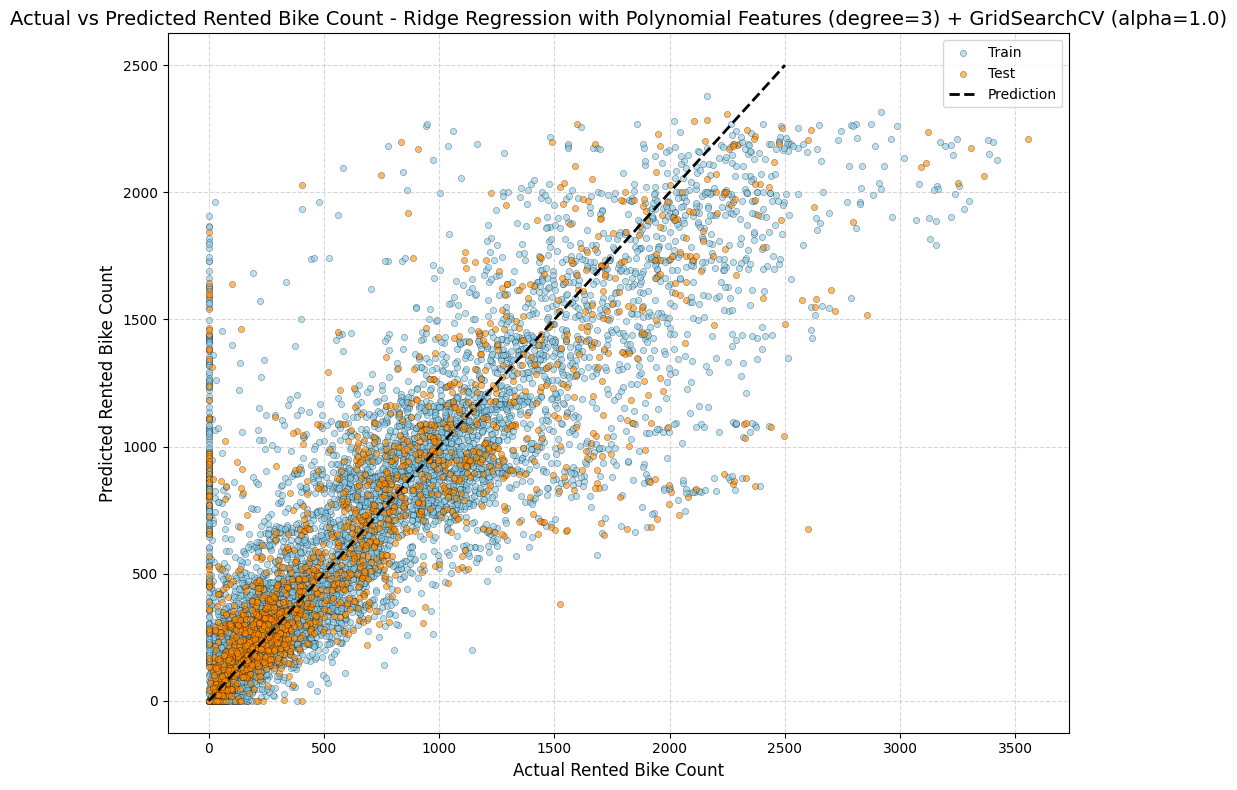

In [ ]:
# create the model object
ridge_model = Ridge(alpha=1.0)

# fit the model on training data
ridge_model.fit(X_train_poly, y_train)

# predict on train and test sets
y_train_pred = ridge_model.predict(X_train_poly)
y_test_pred = ridge_model.predict(X_test_poly)

# clip so there are no negative values
y_train_pred = y_train_pred.clip(min=0)
y_test_pred = y_test_pred.clip(min=0)

# calculate RMAE, RMSE and R² for training and test set
train_rmae = np.sqrt(mean_absolute_error(y_train, y_train_pred))
test_rmae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Ridge Regression with Polynomial Features (degree=3) + GridSearchCV (alpha=1.0)')
print(f'Train RMAE: {train_rmae:.2f}, Train RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}')
print(f'Test RMAE: {test_rmae:.2f}, Test RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}')

# plot actual vs predicted rentals for both sets
plt.figure(figsize=(10, 8))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.6, s=20, color='skyblue', edgecolor='k', linewidth=0.3)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.6, s=20, color='darkorange', edgecolor='k', linewidth=0.3)

plt.plot([0, 2500], [0, 2500], '--', color='black', linewidth=2, label='Prediction')

# add title and labels
plt.xlabel('Actual Rented Bike Count', fontsize=12)
plt.ylabel('Predicted Rented Bike Count', fontsize=12)
plt.title('Actual vs Predicted Rented Bike Count - Ridge Regression with Polynomial Features (degree=3) + GridSearchCV (alpha=1.0)', fontsize=14)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('ridge_regression_final.png', dpi=300)

plt.tight_layout()
plt.show()

## Polynomial Features on Lasso Regression Model

Lasso Regression with Polynomial Features (degree=3) + GridSearchCV (alpha=0.1)
Train RMAE: 14.72, Train RMSE: 341.17, R²: 0.72
Test RMAE: 14.94, Test RMSE: 359.47, R²: 0.69


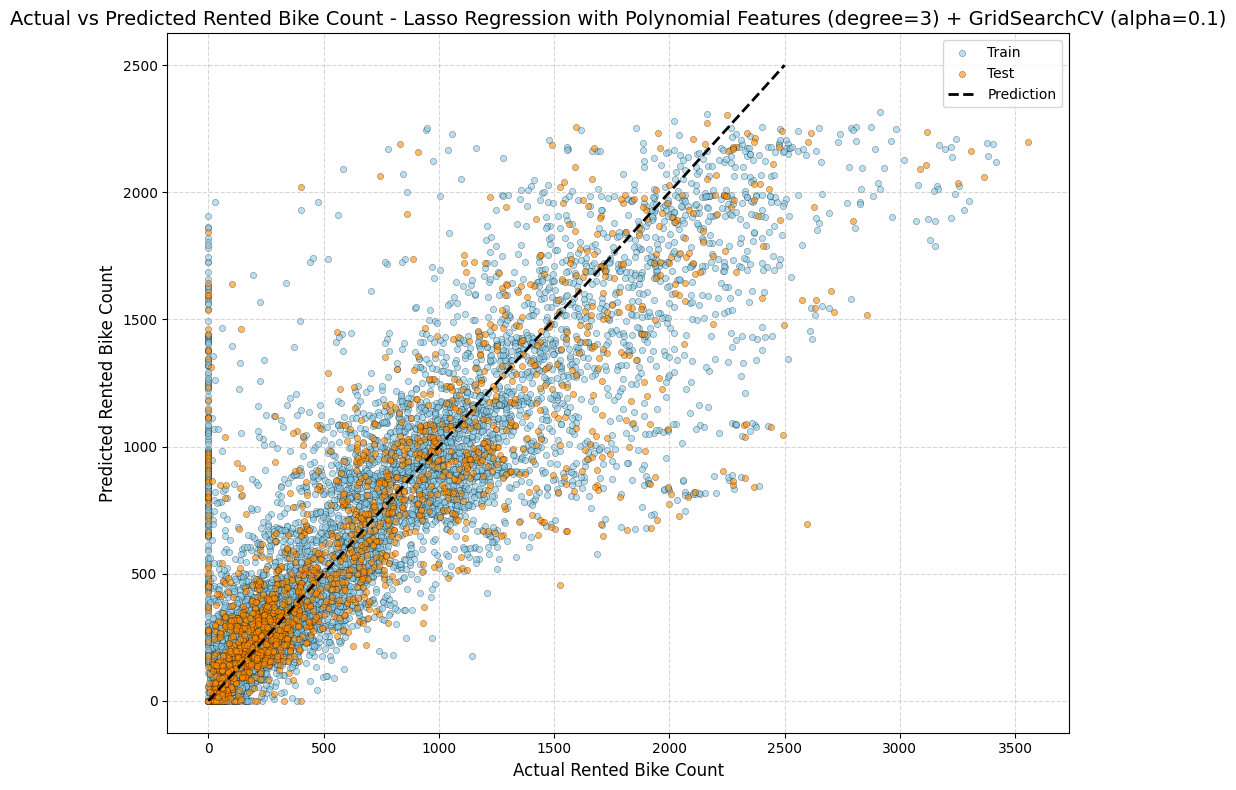

In [ ]:
# create the model object
lasso_model = Lasso(alpha=0.1, max_iter=10000)

# fit the model on training data
lasso_model.fit(X_train_poly, y_train)

# predict on train and test sets
y_train_pred = lasso_model.predict(X_train_poly)
y_test_pred = lasso_model.predict(X_test_poly)

# clip so there are no negative values
y_train_pred = y_train_pred.clip(min=0)
y_test_pred = y_test_pred.clip(min=0)

# calculate RMAE, RMSE and R² for training and test set
train_rmae = np.sqrt(mean_absolute_error(y_train, y_train_pred))
test_rmae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Lasso Regression with Polynomial Features (degree=3) + GridSearchCV (alpha=0.1)')
print(f'Train RMAE: {train_rmae:.2f}, Train RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}')
print(f'Test RMAE: {test_rmae:.2f}, Test RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}')

# plot actual vs predicted rentals for both sets
plt.figure(figsize=(10, 8))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.6, s=20, color='skyblue', edgecolor='k', linewidth=0.3)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.6, s=20, color='darkorange', edgecolor='k', linewidth=0.3)

plt.plot([0, 2500], [0, 2500], '--', color='black', linewidth=2, label='Prediction')

# add title and labels
plt.xlabel('Actual Rented Bike Count', fontsize=12)
plt.ylabel('Predicted Rented Bike Count', fontsize=12)
plt.title('Actual vs Predicted Rented Bike Count - Lasso Regression with Polynomial Features (degree=3) + GridSearchCV (alpha=0.1)', fontsize=14)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('lasso_regression_final.png', dpi=300)

plt.tight_layout()
plt.show()

## Polynomial Features on Elastic Net Regression Model

Elastic Net Regression with Polynomial Features (degree=3) + GridSearchCV (alpha=0.1, l1_ratio=1.0)
Train RMAE: 14.72, Train RMSE: 341.17, R²: 0.72
Test RMAE: 14.94, Test RMSE: 359.47, R²: 0.69


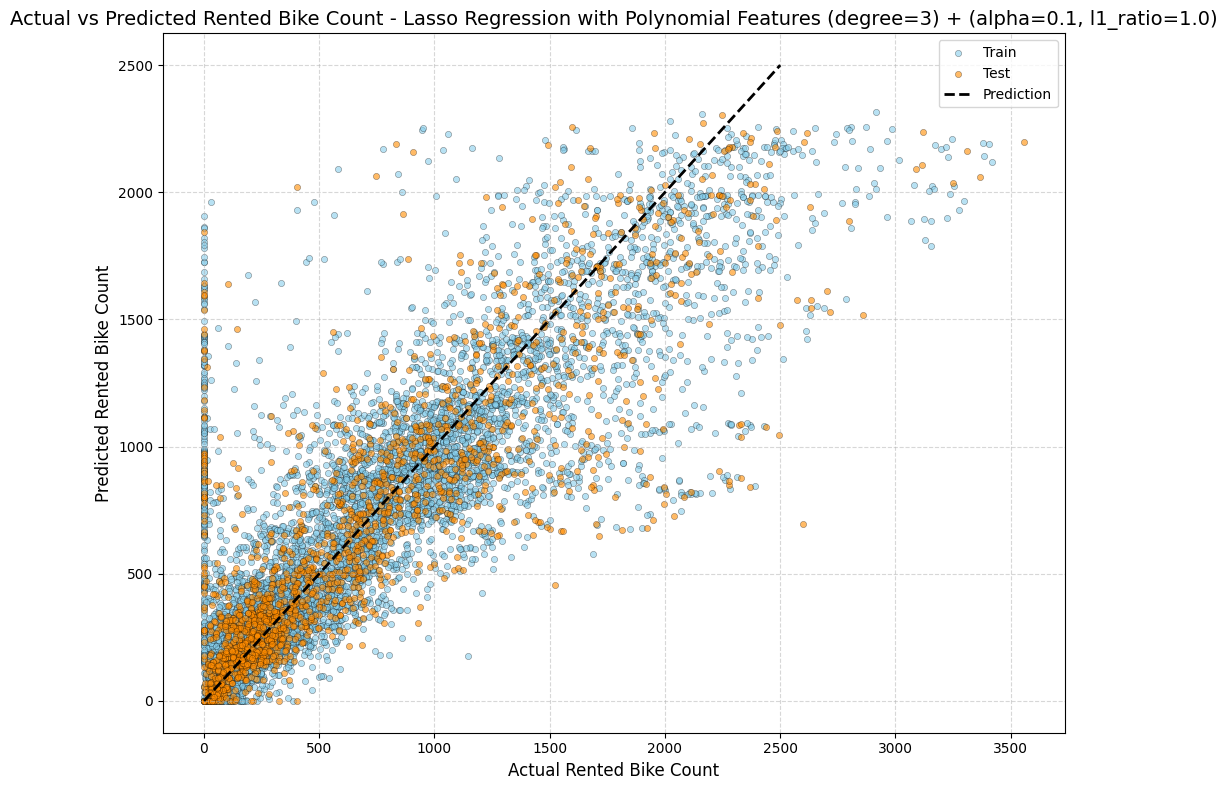

In [ ]:
# create the model object
elastic_model = ElasticNet(alpha=0.1, l1_ratio=1.0, max_iter=10000)

# fit the model on training data
elastic_model.fit(X_train_poly, y_train)

# predict on train and test sets
y_train_pred = elastic_model.predict(X_train_poly)
y_test_pred = elastic_model.predict(X_test_poly)

# clip so there are no negative values
y_train_pred = y_train_pred.clip(min=0)
y_test_pred = y_test_pred.clip(min=0)

# calculate RMAE, RMSE and R² for training and test set
train_rmae = np.sqrt(mean_absolute_error(y_train, y_train_pred))
test_rmae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Elastic Net Regression with Polynomial Features (degree=3) + GridSearchCV (alpha=0.1, l1_ratio=1.0)')
print(f'Train RMAE: {train_rmae:.2f}, Train RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}')
print(f'Test RMAE: {test_rmae:.2f}, Test RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}')

# plot actual vs predicted rentals for both sets
plt.figure(figsize=(10, 8))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.6, s=20, color='skyblue', edgecolor='k', linewidth=0.3)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.6, s=20, color='darkorange', edgecolor='k', linewidth=0.3)

plt.plot([0, 2500], [0, 2500], '--', color='black', linewidth=2, label='Prediction')

# add title and labels
plt.xlabel('Actual Rented Bike Count', fontsize=12)
plt.ylabel('Predicted Rented Bike Count', fontsize=12)
plt.title('Actual vs Predicted Rented Bike Count - Lasso Regression with Polynomial Features (degree=3) + (alpha=0.1, l1_ratio=1.0)', fontsize=14)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('elastic_net_regression_final.png', dpi=300)

plt.tight_layout()
plt.show()

## Model Performance Evaluation

Updated Performance Metrics Summary Table

In [ ]:
# @title
# train/test scores from all Linear Regression model
metrics_data = {
    'Metric': ['Train RMAE', 'Test RMAE', 'Train RMSE', 'Test RMSE', 'Train R²', 'Test R²'],

    'Linear':                          [19.92, 19.91, 539.72, 538.21, 0.30, 0.30],

    'Ridge':                           [18.14, 18.33, 457.33, 469.43, 0.50, 0.47],
    'Ridge (GridSearchCV)':            [18.14, 18.33, 457.33, 469.43, 0.50, 0.47],
    'Ridge (Poly deg=3)':              [14.69, 14.95, 340.44, 360.41, 0.72, 0.69],

    'Lasso':                           [18.15, 18.33, 457.94, 469.99, 0.50, 0.47],
    'Lasso (GridSearchCV)':            [18.14, 18.33, 457.36, 469.46, 0.50, 0.47],
    'Lasso (Poly deg=3)':              [14.72, 14.94, 341.17, 359.47, 0.72, 0.69],

    'Elastic Net':                     [18.63, 18.76, 477.88, 487.18, 0.45, 0.43],
    'Elastic Net (GridSearchCV)':      [18.14, 18.33, 457.36, 469.46, 0.50, 0.47],
    'Elastic Net (Poly deg=3)':        [14.72, 14.94, 341.17, 359.47, 0.72, 0.69]
}

# convert to DataFrame for visual purposes
metrics_df = pd.DataFrame(metrics_data)

metrics_df

Metric  Linear   Ridge  Ridge (GridSearchCV)  Ridge (Poly deg=3)  \
0  Train RMAE   19.92   18.14                 18.14               14.69   
1   Test RMAE   19.91   18.33                 18.33               14.95   
2  Train RMSE  539.72  457.33                457.33              340.44   
3   Test RMSE  538.21  469.43                469.43              360.41   
4    Train R²    0.30    0.50                  0.50                0.72   
5     Test R²    0.30    0.47                  0.47                0.69   

    Lasso  Lasso (GridSearchCV)  Lasso (Poly deg=3)  Elastic Net  \
0   18.15                 18.14               14.72        18.63   
1   18.33                 18.33               14.94        18.76   
2  457.94                457.36              341.17       477.88   
3  469.99                469.46              359.47       487.18   
4    0.50                  0.50                0.72         0.45   
5    0.47                  0.47                0.69         0.43   

   Elastic Net (GridSearchCV)  Elastic Net (Poly deg=3)  
0                       18.14                     14.72  
1                       18.33                     14.94  
2                      457.36                    341.17  
3                      469.46                    359.47  
4                        0.50                      0.72  
5                        0.47                      0.69

All three polynomial models with degree=3 show significant improvement over their linear counterparts, even compared to models with just Hyperparameter Tuning. Lower RMAE and RMSE across the board indicate better error reduction, while higher R² values suggest that the models explain more variance in the target variable, meaning better overall accuracy.

The best-performing model among all tested was Elastic Net with L1 penalty (degree=3).

## Plot Capturing of Polynomial Features on Elastic Net Regression Model with Degree=3


Actual vs Predicted Rented Bike Count (Test Set):
          Hour_sin      Hour_cos  Temperature(C)  actual_rented_bike_count  \
6056  1.224745e+00 -7.071068e-01        1.198669                      1728   
5556  1.995745e-16 -1.414214e+00        1.650774                       822   
5990 -7.071068e-01 -1.224745e+00        1.767986                       658   
7674 -1.414214e+00 -1.813539e-16        0.336322                      2716   
3319  1.366025e+00 -3.660254e-01       -0.542770                      1083   

      predicted_rented_bike_count  
6056                  1032.463317  
5556                   643.826522  
5990                   690.518862  
7674                  1529.251533  
3319                   513.985929  


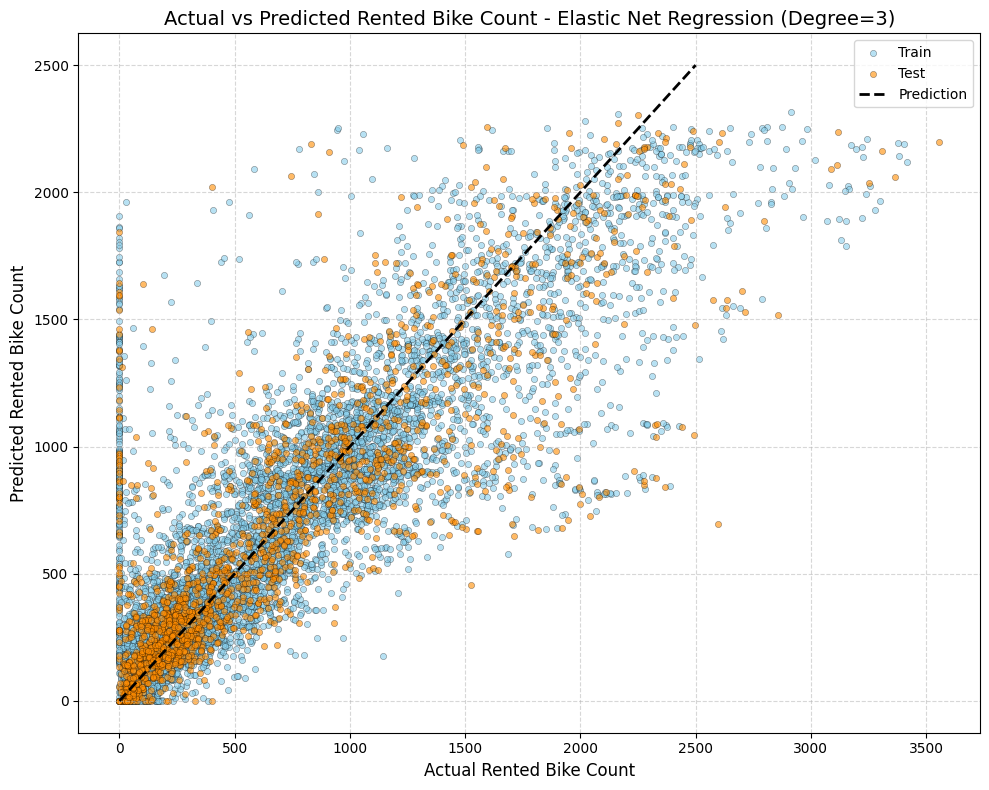

In [ ]:
# show comparison table for the test set
results_df = X_test.copy()
results_df['actual_rented_bike_count'] = y_test
results_df['predicted_rented_bike_count'] = y_test_pred
print('\nActual vs Predicted Rented Bike Count (Test Set):')
print(results_df[['Hour_sin', 'Hour_cos', 'Temperature(C)', 'actual_rented_bike_count', 'predicted_rented_bike_count']].head())

# plot actual vs predicted rentals for both sets
plt.figure(figsize=(10, 8))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.6, s=20, color='skyblue', edgecolor='k', linewidth=0.3)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.6, s=20, color='darkorange', edgecolor='k', linewidth=0.3)

plt.plot([0, 2500], [0, 2500], '--', color='black', linewidth=2, label='Prediction')

# add title and labels
plt.xlabel('Actual Rented Bike Count', fontsize=12)
plt.ylabel('Predicted Rented Bike Count', fontsize=12)
plt.title('Actual vs Predicted Rented Bike Count - Elastic Net Regression (Degree=3)', fontsize=14)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Save the Best Performing model

In [ ]:
import joblib

joblib.dump(elastic_model, 'best_model_elasticnet_degree3.pkl')

['best_model_elasticnet_degree3.pkl']

# Task 4: Model Evaluation and Validation

## Cross-Validation on Linear Regression Models without Polynomial Features

In [ ]:
# redefining models without Polynomial Features and putting in a dictionary to be loop through
models = {
    'Linear': LinearRegression(positive=True),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1, max_iter=10000),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=1.0, max_iter=10000)
}

# define KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    rmae_scores = []
    rmse_scores = []
    r2_scores = []
    all_y_true = []
    all_y_pred = []

    print(f'=== {model_name} Model (No Polynomial Features) ===')

    for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):

        # split the features and target into training and testing sets for this fold
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # clone model to prevent any retain internal state
        model_clone = clone(model)

        # fit the model on the current fold's training data
        model_clone.fit(X_train, y_train)

        # predict on test sets
        y_test_pred = model_clone.predict(X_test)

        # clip so there are no negative values
        y_test_pred = y_test_pred.clip(min=0)

        # calculate RMAE, RMSE and R² for this fold
        test_rmae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)

        # save the metrics to their respective lists for later averaging
        rmae_scores.append(test_rmae)
        rmse_scores.append(test_rmse)
        r2_scores.append(test_r2)

        # accumulate the true target values from this fold into a master list
        # this will let us evaluate overall performance across all folds
        all_y_true.extend(y_test)

        # accumulate the predicted values from this fold into a master list
        # used to compare against all_y_true for plotting or overall metrics
        all_y_pred.extend(y_test_pred)

        print(f'Fold {fold}: RMAE = {test_rmae:.3f}, RMSE = {test_rmse:.3f}, R² = {test_r2:.3f}')

    print('\nCross-Validation Results (Averaged Across Folds):')
    print(f'Avg RMAE: {np.mean(rmae_scores):.3f}')
    print(f'Avg RMSE: {np.mean(rmse_scores):.3f}')
    print(f'Avg R²:   {np.mean(r2_scores):.3f}\n')

=== Linear Model (No Polynomial Features) ===
Fold 1: RMAE = 19.914, RMSE = 538.210, R² = 0.305
Fold 2: RMAE = 19.873, RMSE = 539.637, R² = 0.296
Fold 3: RMAE = 20.065, RMSE = 541.808, R² = 0.299
Fold 4: RMAE = 19.672, RMSE = 532.331, R² = 0.315
Fold 5: RMAE = 20.149, RMSE = 546.063, R² = 0.286

Cross-Validation Results (Averaged Across Folds):
Avg RMAE: 19.935
Avg RMSE: 539.610
Avg R²:   0.300

=== Ridge Model (No Polynomial Features) ===
Fold 1: RMAE = 18.327, RMSE = 469.427, R² = 0.471
Fold 2: RMAE = 18.235, RMSE = 466.117, R² = 0.474
Fold 3: RMAE = 18.166, RMSE = 458.079, R² = 0.499
Fold 4: RMAE = 17.908, RMSE = 444.339, R² = 0.522
Fold 5: RMAE = 18.302, RMSE = 463.487, R² = 0.485

Cross-Validation Results (Averaged Across Folds):
Avg RMAE: 18.188
Avg RMSE: 460.290
Avg R²:   0.490

=== Lasso Model (No Polynomial Features) ===
Fold 1: RMAE = 18.327, RMSE = 469.458, R² = 0.471
Fold 2: RMAE = 18.236, RMSE = 466.132, R² = 0.474
Fold 3: RMAE = 18.167, RMSE = 458.098, R² = 0.499
Fold 4: 

## Cross-Validation on Linear Regression Models with Polynomial Features

In [ ]:
# define polynomial transformer for degree 3
poly = PolynomialFeatures(degree=3, include_bias=False)

# redefining models without Polynomial Features and putting in a dictionary to be loop through
models = {
    'Linear': LinearRegression(positive=True),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1, max_iter=10000),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=1.0, max_iter=10000)
}

# define KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    rmae_scores = []
    rmse_scores = []
    r2_scores = []
    all_y_true = []
    all_y_pred = []

    print(f'=== {model_name} Model (With Polynomial Features degree=3) ===')

    for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):

        # split the features and target into training and testing sets for this fold
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # generate Polynomial Features
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_poly)
        X_test_scaled = scaler.transform(X_test_poly)

        # clone model to prevent any retain internal state
        model_clone = clone(model)

        # fit the model on the current fold's training data
        model_clone.fit(X_train_scaled, y_train)

        # predict on test sets
        y_test_pred = model_clone.predict(X_test_scaled)

        # clip so there are no negative values
        y_test_pred = y_test_pred.clip(min=0)

        # calculate RMAE, RMSE and R² for this fold
        test_rmae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)

        # save the metrics to their respective lists for later averaging
        rmae_scores.append(test_rmae)
        rmse_scores.append(test_rmse)
        r2_scores.append(test_r2)

        # accumulate the true target values from this fold into a master list
        # this will let us evaluate overall performance across all folds
        all_y_true.extend(y_test)

        # accumulate the predicted values from this fold into a master list
        # used to compare against all_y_true for plotting or overall metrics
        all_y_pred.extend(y_test_pred)

        print(f'Fold {fold}: RMAE = {test_rmae:.3f}, RMSE = {test_rmse:.3f}, R² = {test_r2:.3f}')

    print('\nCross-Validation Results (Averaged Across Folds):')
    print(f'Avg RMAE: {np.mean(rmae_scores):.3f}')
    print(f'Avg RMSE: {np.mean(rmse_scores):.3f}')
    print(f'Avg R²:   {np.mean(r2_scores):.3f}\n')

=== Linear Model (With Polynomial Features degree=3) ===
Fold 1: RMAE = 16.748, RMSE = 420.264, R² = 0.576
Fold 2: RMAE = 16.726, RMSE = 414.720, R² = 0.584
Fold 3: RMAE = 20.844, RMSE = 6325.197, R² = -94.565
Fold 4: RMAE = 16.392, RMSE = 383.699, R² = 0.644
Fold 5: RMAE = 16.881, RMSE = 420.073, R² = 0.577

Cross-Validation Results (Averaged Across Folds):
Avg RMAE: 17.518
Avg RMSE: 1592.791
Avg R²:   -18.437

=== Ridge Model (With Polynomial Features degree=3) ===
Fold 1: RMAE = 15.034, RMSE = 370.777, R² = 0.670
Fold 2: RMAE = 14.814, RMSE = 347.448, R² = 0.708
Fold 3: RMAE = 15.013, RMSE = 348.930, R² = 0.709
Fold 4: RMAE = 14.706, RMSE = 333.036, R² = 0.732
Fold 5: RMAE = 15.038, RMSE = 349.993, R² = 0.706

Cross-Validation Results (Averaged Across Folds):
Avg RMAE: 14.921
Avg RMSE: 350.037
Avg R²:   0.705

=== Lasso Model (With Polynomial Features degree=3) ===
Fold 1: RMAE = 14.971, RMSE = 360.684, R² = 0.688
Fold 2: RMAE = 14.823, RMSE = 349.674, R² = 0.704
Fold 3: RMAE = 15.0

## Model Performance Evaluation

Performance Metrics Summary Table

In [ ]:
# @title
# CV-averaged scores from all models with and without Polynomial Features
metrics_data = {
    'Metric': ['Test RMAE', 'Test RMSE', 'Test R²'],

    'Linear': [19.935, 539.610, 0.300],
    'Linear (Poly deg=3)': [17.518, 1592.791, -18.437],

    'Ridge': [18.188, 460.290, 0.490],
    'Ridge (Poly deg=3)': [14.921, 350.037, 0.705],

    'Lasso': [18.188, 460.316, 0.490],
    'Lasso (Poly deg=3)': [14.914, 350.527, 0.704],

    'Elastic Net': [18.188, 460.316, 0.490],
    'Elastic Net (Poly deg=3)': [14.914, 350.527, 0.704]
}

# convert to DataFrame for visual purposes
metrics_df = pd.DataFrame(metrics_data)

metrics_df

Metric   Linear  Linear (Poly deg=3)    Ridge  Ridge (Poly deg=3)  \
0  Test RMAE   19.935               17.518   18.188              14.921   
1  Test RMSE  539.610             1592.791  460.290             350.037   
2    Test R²    0.300              -18.437    0.490               0.705   

     Lasso  Lasso (Poly deg=3)  Elastic Net  Elastic Net (Poly deg=3)  
0   18.188              14.914       18.188                    14.914  
1  460.316             350.527      460.316                   350.527  
2    0.490               0.704        0.490                     0.704

Cross-Validation confirms that Polynomial Features significantly improve the performance of all regularized models. However, plain Linear Regression with Polynomial Features overfits badly, indicating that linear models without regularization cannot handle the large number of features generated by polynomial expansion.

Among all models, Ridge Regression performed the best overall, achieving the lowest RMSE, the highest R², and the most consistent performance across all folds. Lasso and Elastic Net perform virtually identically to Ridge.

Polynomial Features enable models to capture Non-Linear relationships, such as the interaction between temperature and hour, which are especially important in accurately predicting bike rental demand.

#  Task 5: Reporting and Insights

The objective of this project was to develop a model capable of accurately predicting hourly Rented Bike Counts. Accurate forecasting of bike demand can support better resource allocation and enhance user satisfaction.

The analysis began with a baseline Linear Regression model, followed by the application of regularization techniques including Ridge, Lasso, and Elastic Net, along with Hyperparameter Tuning using GridSearchCV. Polynomial Feature transformations were also introduced to capture Non-Linear patterns in the data.

The best performing model, Elastic Net regression with Polynomial Features of degree 3, demonstrated strong predictive accuracy and effectively balanced bias and variance.

## Key Findings and Insights
As part of the Feature Engineering process, a Correlation Matrix was generated to identify which numerical features were positively or negatively correlated with the Rented Bike Count.



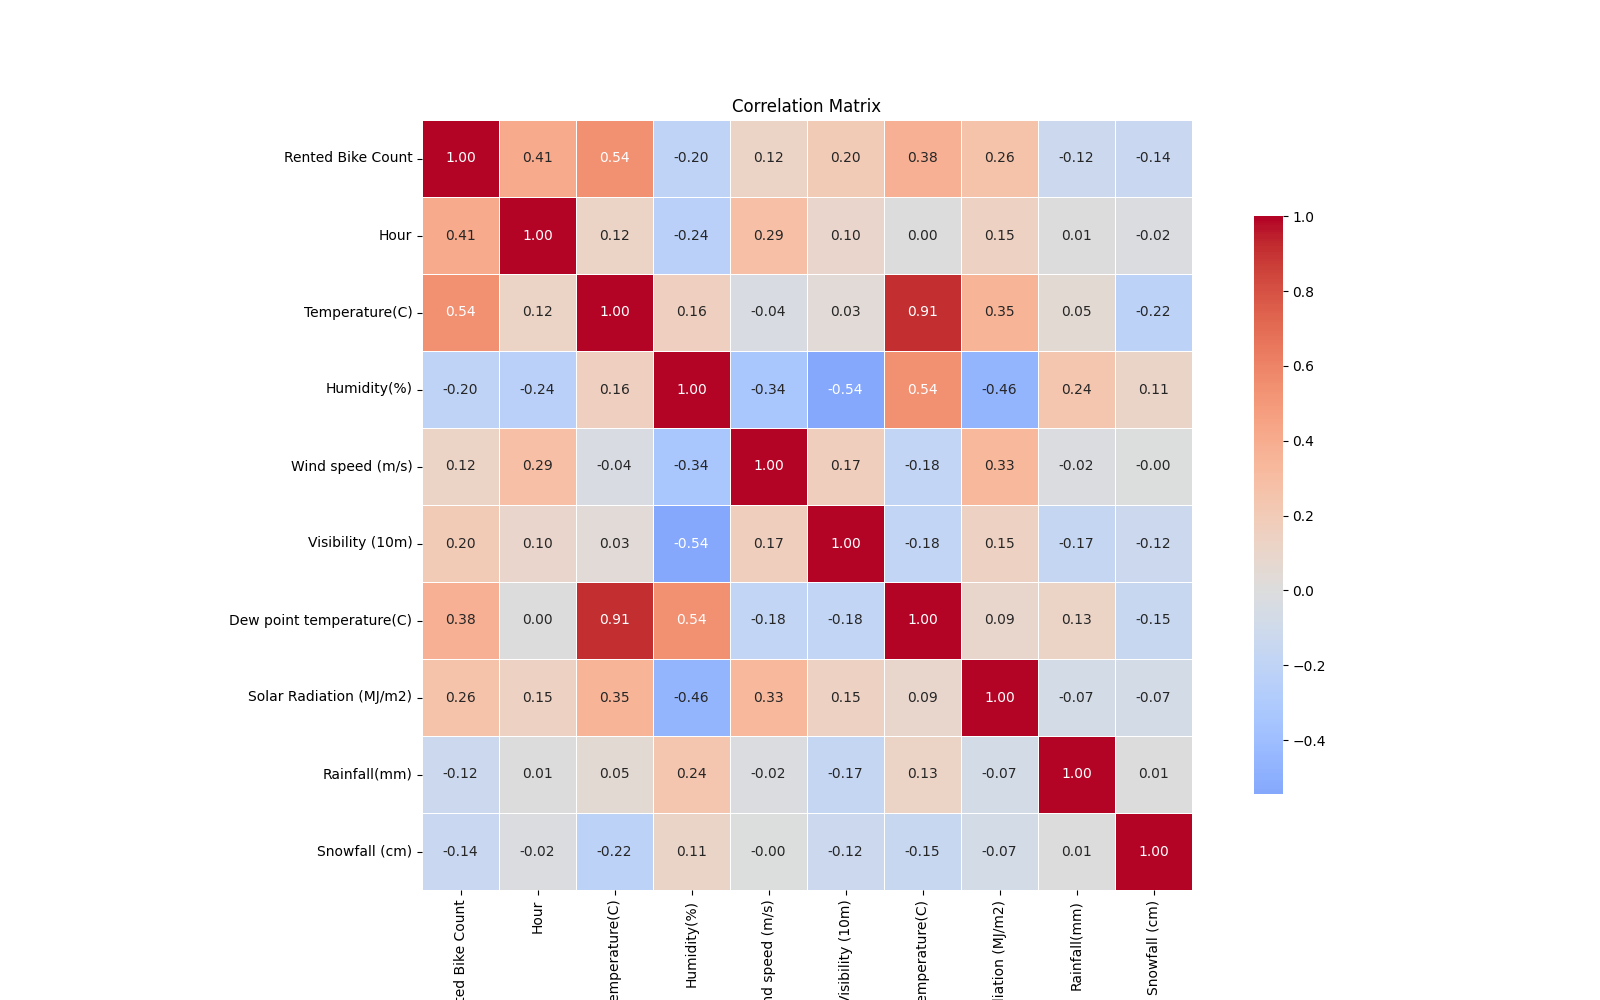

In [ ]:
# @title
Image('correlation_matrix.png')

The Hour variable was transformed using cyclical encoding. Although Hour is represented numerically (0 to 23), it reflects time of day rather than a true continuous numeric scale. Modeling it linearly would incorrectly suggest that 23:00 is far from 00:00, when in reality they are adjacent. To address this, sine and cosine transformations were applied to preserve its cyclical nature.

A histogram of the Rented Bike Counts provided an initial understanding of the data distribution. The plot revealed a strong right skew, suggesting the presence of outliers and infrequent surges in hourly rentals. The majority of rental activity is clustered at lower values.

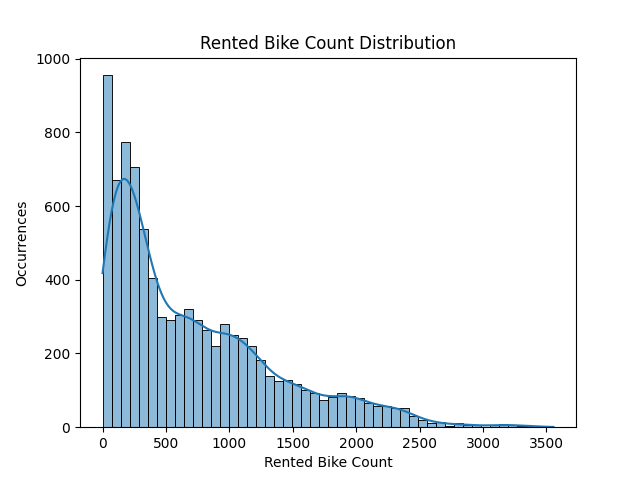

In [ ]:
# @title
Image('rentals_distribution.png')

Model building began with a baseline Linear Regression model. The plot below illustrates its performance.

In [ ]:
# @title
Image('linear_regression_base.png')

Output hidden; open in https://colab.research.google.com to view.

The scatter plot compares actual vs. predicted Rented Bike Counts. The wide dispersion of points around the diagonal line indicates high prediction error, especially at higher rental counts. This suggests that the base model struggles to capture complex patterns in the data, leading to underfitting.

Ridge, Lasso, and Elastic Net regularization techniques were applied to improve model generalization.

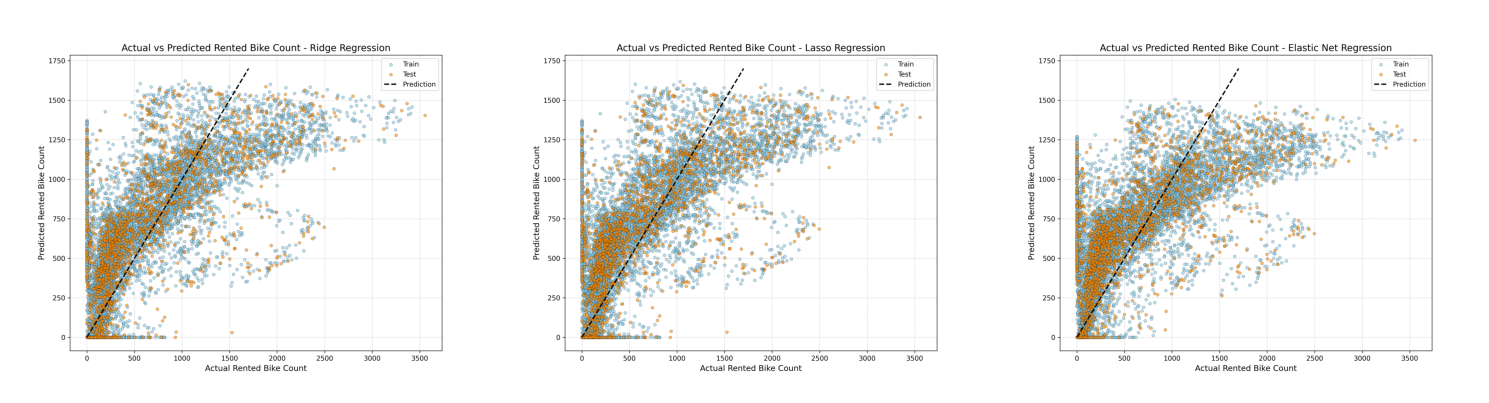

In [ ]:
# @title
img1 = mpimg.imread('/content/ridge_regression_base.png')
img2 = mpimg.imread('/content/lasso_regression_base.png')
img3 = mpimg.imread('/content/elastic_net_regression_base.png')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img1)
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].axis('off')

axes[2].imshow(img3)
axes[2].axis('off')

plt.tight_layout()
plt.show()

While all three models showed better performance than the baseline, a wide spread of points still exists, especially at higher rental counts. This indicates that accurately predicting extreme values remains a challenge. Elastic Net achieved the most balanced performance between underfitting and overfitting.

Further refinements were made to the regularized models using Hyperparameter Tuning and Polynomial Features transformation. Hyperparameter Tuning helped optimize model performance by finding the best balance between bias and variance, while Polynomial Features captured Non-Linear relationships in the data that linear models might miss.

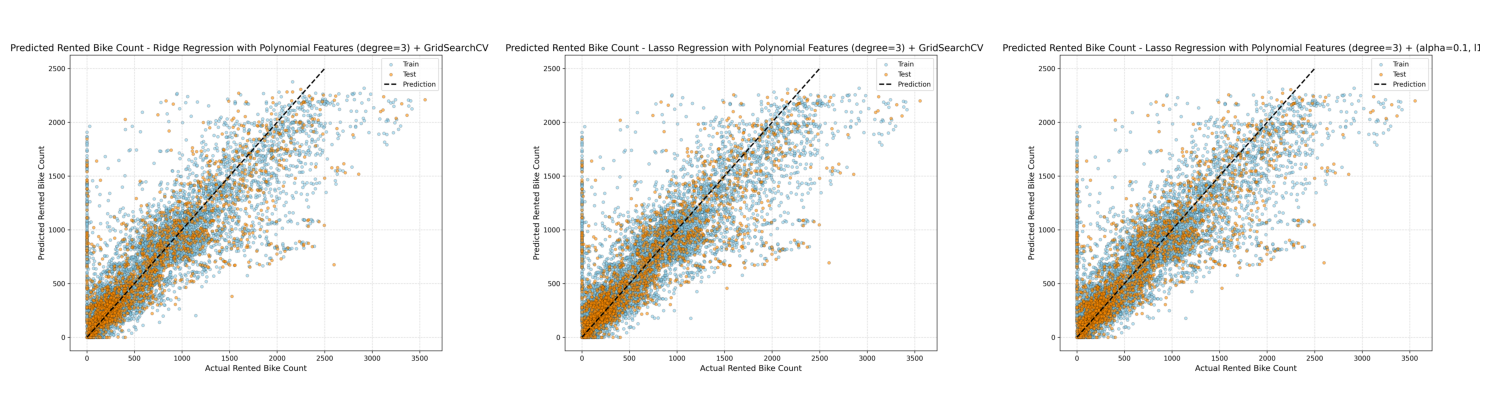

In [ ]:
# @title
img1 = mpimg.imread('/content/ridge_regression_final.png')
img2 = mpimg.imread('/content/lasso_regression_final.png')
img3 = mpimg.imread('/content/elastic_net_regression_final.png')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img1)
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].axis('off')

axes[2].imshow(img3)
axes[2].axis('off')

plt.tight_layout()
plt.show()

All three regression models show a strong positive correlation between actual and predicted bike counts. The tighter clustering around the diagonal in all plots indicates improved predictive performance with minimal signs of overfitting.

Finally, K-Fold Cross-Validation was performed to evaluate and compare the performance of each model.

In [ ]:
# @title
cv_results = pd.DataFrame({
    'Model': [
        'Linear (Poly deg=3)',
        'Ridge (Poly deg=3)',
        'Lasso (Poly deg=3)',
        'Elastic Net (Poly deg=3)'
    ],
    'Avg RMAE': [17.518, 14.921, 14.914, 14.914],
    'Avg RMSE': [1592.791, 350.037, 350.527, 350.527],
    'Avg R²': [-18.437, 0.705, 0.704, 0.704]
})

cv_results.set_index('Model', inplace=True)

cv_results.style.set_caption('Cross-Validation Results (Polynomial Features Degree = 3)').format({'Avg RMAE': '{:.3f}', 'Avg RMSE': '{:.3f}', 'Avg R²': '{:.3f}'})

Ridge Regression consistently outperforms the others, offering the best balance of accuracy and stability across folds. Lasso and Elastic Net closely follow with nearly indistinguishable metrics.

The improvement from the base Linear Regression to the final Ridge Regression model is clearly visible!

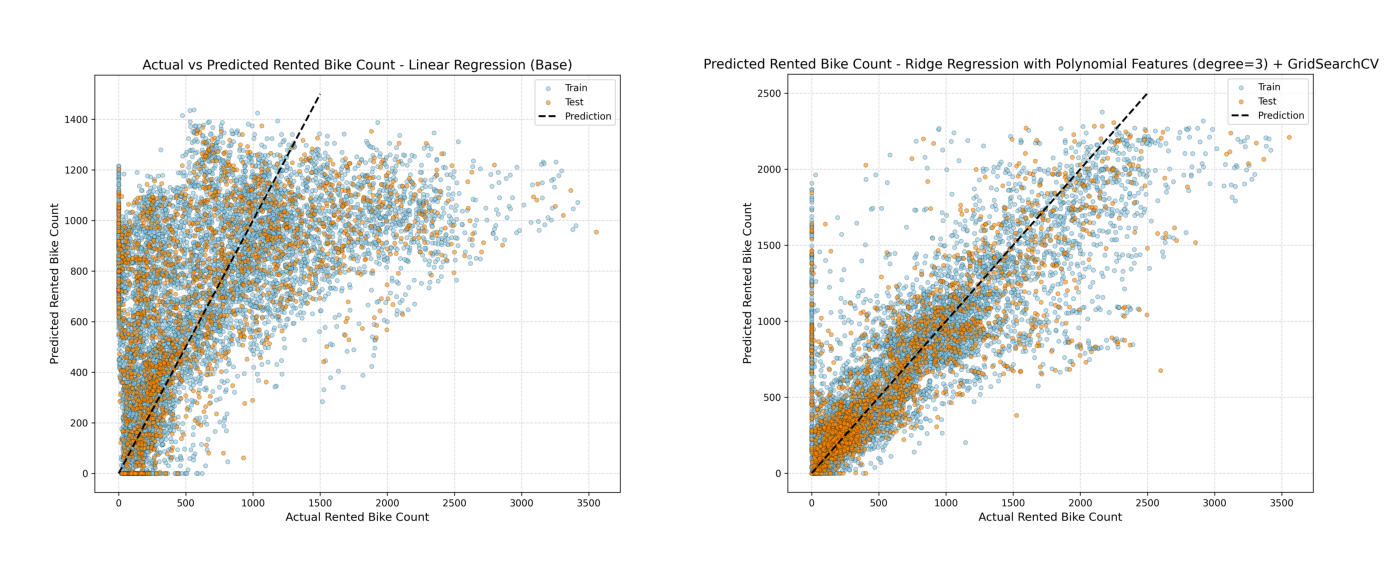

In [ ]:
# @title
img1 = mpimg.imread('/content/linear_regression_base.png')
img2 = mpimg.imread('/content/ridge_regression_final.png')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(img1)
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Feature Importance and Business Implications

Regularized models reduce or eliminate less influential features, making their coefficients useful for identifying feature importance. These results also support the patterns observed in the Correlation Matrix.

Temperature has a strong positive correlation with bike rentals. Warmer weather tends to increase demand. In contrast, bad weather conditions such as rain or snow are associated with lower rental activity. Certain hours, especially in the morning and evening, likely correspond to commuting times and contribute to higher usage. Rental patterns also differ between working days and holidays, reflecting changes in user behavior.

Based on these insights, the company can apply surge pricing on warm, dry days and offer discounts during rainy or snowy periods to stabilize demand. Ensuring there are enough bikes available during peak hours will help capture high-traffic periods and improve customer experience.


## Recommendations for Further Improvements

Extracting seasonal trends by aggregating rental data on a monthly or quarterly basis can help improve predictive performance by revealing recurring patterns throughout the year. Additionally, incorporating external factors such as local events, traffic conditions, and public holidays can enhance model accuracy by accounting for fluctuations in demand that are not explained by weather or time alone.

For model enhancements, alternative algorithms such as Random Forest, Gradient Boosting, or XGBoost can be explored. These models naturally capture Non-Linear relationships and feature interactions without requiring manual Polynomial Feature expansion, making them suitable for more complex patterns in the data.